# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

In [99]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
# For supressing warnings

import warnings
warnings.filterwarnings('ignore')

In [101]:
df=pd.read_csv(r"D:\Upgrad Files\Linear Regression Problem\day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [102]:
# Number of rows and columns
df.shape

(730, 16)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### No Null values in the dataset

In [104]:
# Converting object type date to datetime

df['dteday'] = pd.to_datetime(df['dteday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [105]:
# Extracting date column
df['date']=df['dteday'].apply(lambda x:x.day)

In [106]:
# Dropping unnecessary column
df.drop(columns=['instant','dteday'],inplace=True)

In [107]:
# Renaming Columns 
df.rename(columns={'yr':'year'},inplace=True)
df.rename(columns={'mnth':'month'},inplace=True)
df.rename(columns={'cnt':'count'},inplace=True)
df.rename(columns={'hum':'humidity'},inplace=True)



In [108]:
# To check unique values
a=df.columns
for i in a:
    print(df[i].value_counts())

3    188
2    184
1    180
4    178
Name: season, dtype: int64
1    365
0    365
Name: year, dtype: int64
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: month, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64
1    499
0    231
Name: workingday, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64
10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847    1
5.526103     1
Name: temp, Length: 498, dtype: int64
32.73440    4
18.78105    3
31.85040    3
16.28750    2
17.58145    2
           ..
36.96315    1
24.93625    1
32.73460    1
14.82130    1
9.31250     1
Name: atemp, Length: 689, dtype: int64
61.3333    4
69.7083    3
59.0000    3
57.0000    3
72.9583    3
          ..
64.7917    1
44.9583    1
71.2083    1
50.

#### season,mnth,weekday,weatherlist to be converted to categorical values because numeric values associated with the labels may indicate that there is some order to them - which is actually not the case

In [109]:
df['season']=df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df['month']=df['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weekday']=df['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
df['weathersit']=df['weathersit'].astype('category')
df['date']=df['date'].astype('category')
df['year']=df['year'].astype('category')
df['holiday']=df['holiday'].astype('category')
df['workingday']=df['workingday'].astype('category')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    object  
 1   year        730 non-null    category
 2   month       730 non-null    object  
 3   holiday     730 non-null    category
 4   weekday     730 non-null    object  
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  casual      730 non-null    int64   
 12  registered  730 non-null    int64   
 13  count       730 non-null    int64   
 14  date        730 non-null    category
dtypes: category(5), float64(4), int64(3), object(3)
memory usage: 62.6+ KB


In [111]:
df

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count,date
0,spring,0,Jan,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,spring,0,Jan,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,spring,0,Jan,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1
3,spring,0,Jan,0,Tue,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1
4,spring,0,Jan,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,Dec,0,Thu,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114,27
726,spring,1,Dec,0,Fri,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095,28
727,spring,1,Dec,0,Sat,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341,29
728,spring,1,Dec,0,Sun,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796,30


In [112]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [113]:
df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'count', 'date'],
      dtype='object')

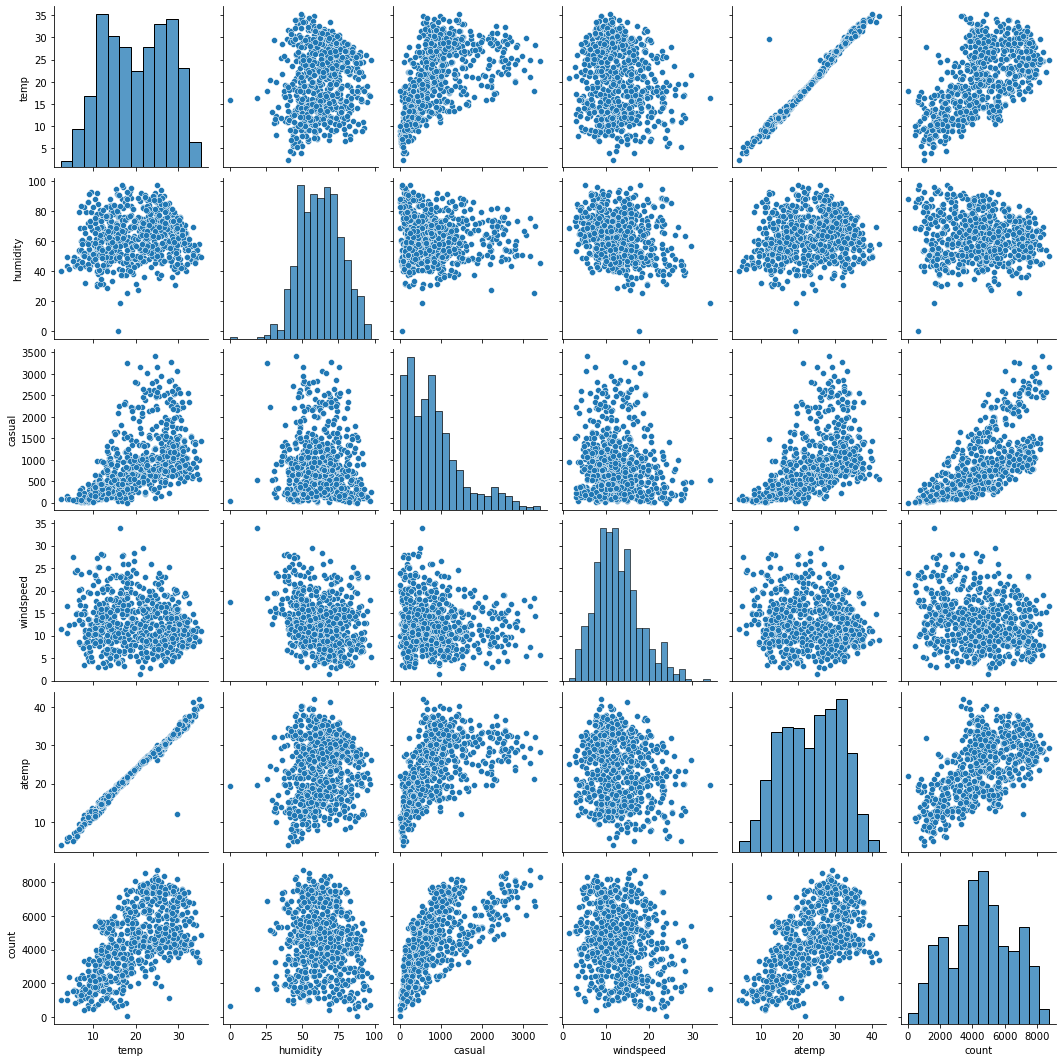

In [116]:
#Pairplot for numeric variables
sns.pairplot(df, vars=['temp', 'humidity','casual','windspeed','atemp','count'])
plt.show()

### Numerical values in weathersit represents
weathersit : 
* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

## Data Analysis

### Univariate Analysis

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
season


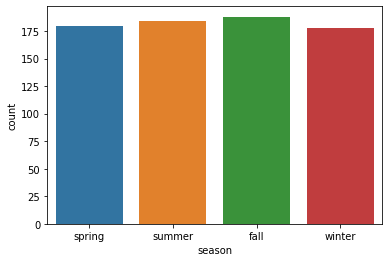

Aug      62
Mar      62
May      62
Jul      62
Jan      62
Oct      62
Dec      62
Jun      60
Sep      60
April    60
Nov      60
Feb      56
Name: month, dtype: int64
month


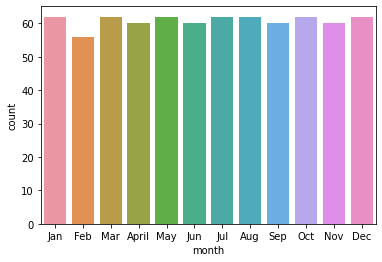

0    709
1     21
Name: holiday, dtype: int64
holiday


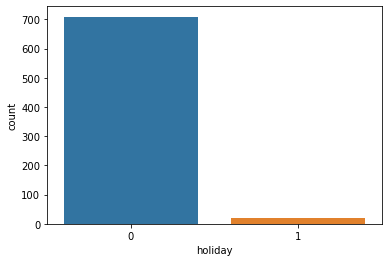

Sat    105
Mon    105
Sun    105
Thu    104
Fri    104
Tue    104
Wed    103
Name: weekday, dtype: int64
weekday


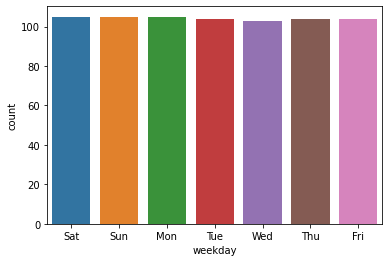

1    499
0    231
Name: workingday, dtype: int64
workingday


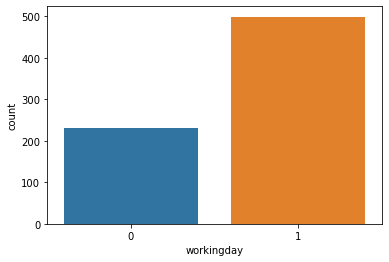

1    463
2    246
3     21
Name: weathersit, dtype: int64
weathersit


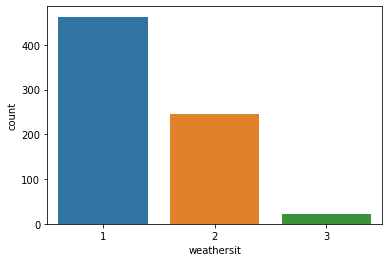

16    24
15    24
2     24
3     24
4     24
5     24
6     24
7     24
8     24
9     24
10    24
11    24
12    24
13    24
14    24
1     24
17    24
18    24
19    24
20    24
21    24
22    24
23    24
24    24
25    24
26    24
27    24
28    24
30    22
29    22
31    14
Name: date, dtype: int64
date


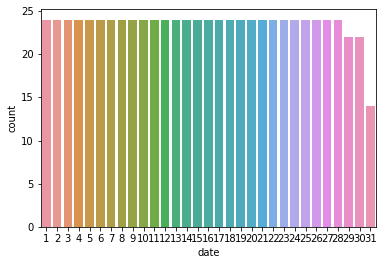

In [19]:
categorical_values=['season', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'date']
for i in categorical_values:
    print(df[i].value_counts())
    print(i)
    sns.countplot(x=i,data=df)
    plt.show()
    #plt.xticks(rotation=90)

In [20]:
# Season fall as high number of count followed by summer, spring, winter
# Less number of rentals count are happening in the month of Febrauary
# Less number of rentals count are happening during holidays
# Less number of rentals count is happening during wednesday's
# More number of rentals count are happening during working days
# More number of rentals count are happening  for category 1: Clear, Few clouds, Partly cloudy, Partly cloudy

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64


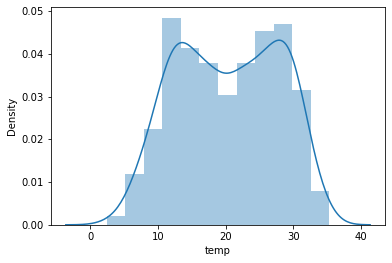

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64


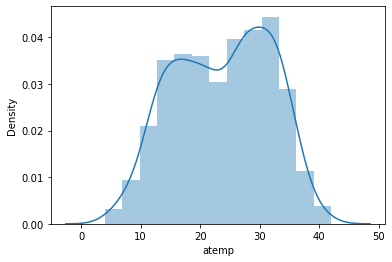

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: humidity, dtype: float64


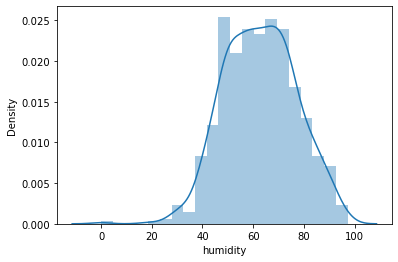

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64


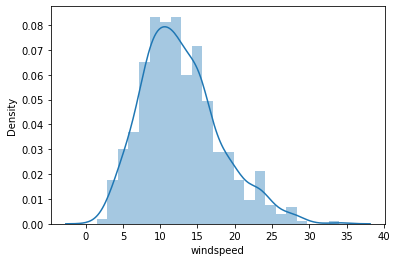

count     730.000000
mean      849.249315
std       686.479875
min         2.000000
25%       316.250000
50%       717.000000
75%      1096.500000
max      3410.000000
Name: casual, dtype: float64


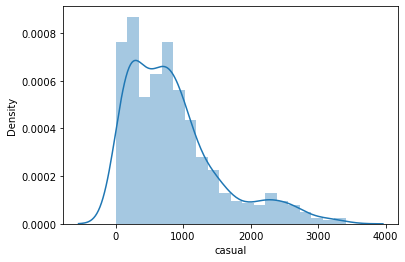

count     730.000000
mean     3658.757534
std      1559.758728
min        20.000000
25%      2502.250000
50%      3664.500000
75%      4783.250000
max      6946.000000
Name: registered, dtype: float64


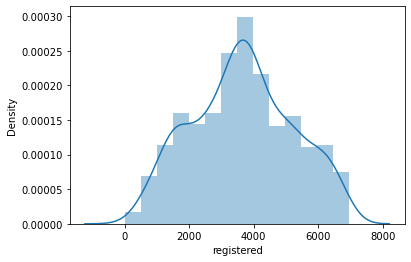

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: count, dtype: float64


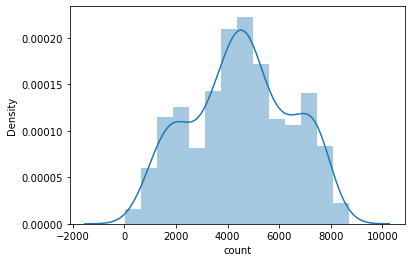

In [21]:
numeric_values=['temp','atemp','humidity','windspeed','casual','registered','count']
for i in numeric_values:
    print(df[i].describe())
    sns.distplot(df[i])
    plt.show()

In [22]:
# Most of the rental happens between 10 to 30 degree celsius
# Most of the rental happens when people feel between 12 to 35 degree celsius
# Most of the rental happens when humidity is in between 45 to 75 range
# Most of the rental happens when windspeed between 5 to 18 range



### Bivariate analysis of categorical variables against target variable 'cnt'


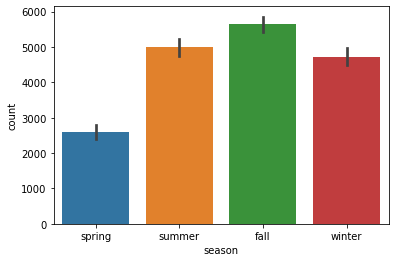

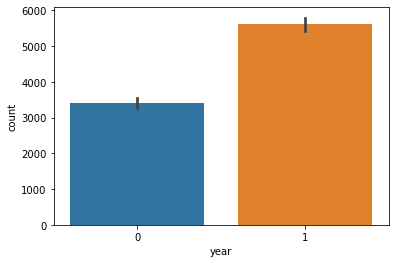

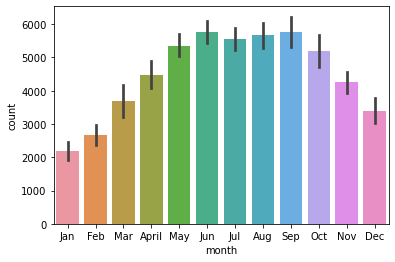

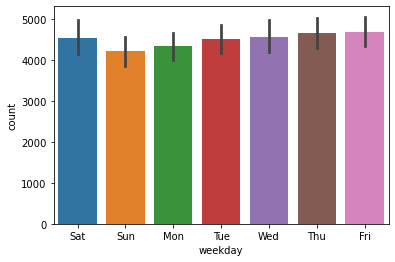

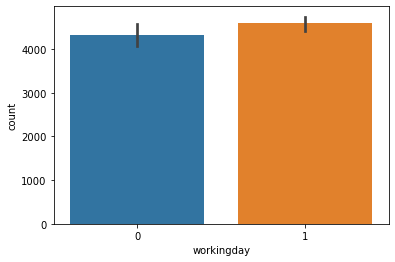

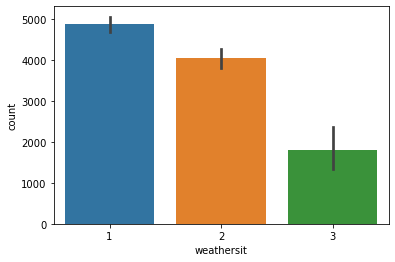

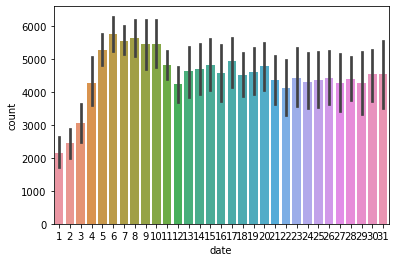

In [24]:
categorical_values=['season', 'year', 'month', 'weekday', 'workingday',
       'weathersit', 'date']
for i in categorical_values:
    
    sns.barplot(x=i,y='count',data=df)
    plt.show()

In [25]:
# During fall season more number of rentals happens
# Rental Sales increased more in the year 2019
# Rental Sales are more during May till October months
# Rental Sales are less during Sunday and Monday
# Rental Sales are more during Clear, Few clouds, Partly cloudy, Partly cloudy weather
# Rental Sales are more during 5th to 10th of every month

In [27]:
# Dropping unnecessary columns which doesn't adds much value
df.drop(columns=['date','casual','registered','atemp'],inplace=True)

In [28]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,2,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,2,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,1,9.305237,43.6957,12.522300,1600


In [29]:
bike_new = pd.get_dummies(df, drop_first=True)
bike_new

,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_1,month_Aug,month_Dec,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,weathersit_2,weathersit_3
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,10.420847,65.2917,23.458911,2114,1,0,0,1,0,1,...,0,0,0,0,1,0,0,1,1,0
726,10.386653,59.0000,10.416557,3095,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
727,10.386653,75.2917,8.333661,1341,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
728,10.489153,48.3333,23.500518,1796,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


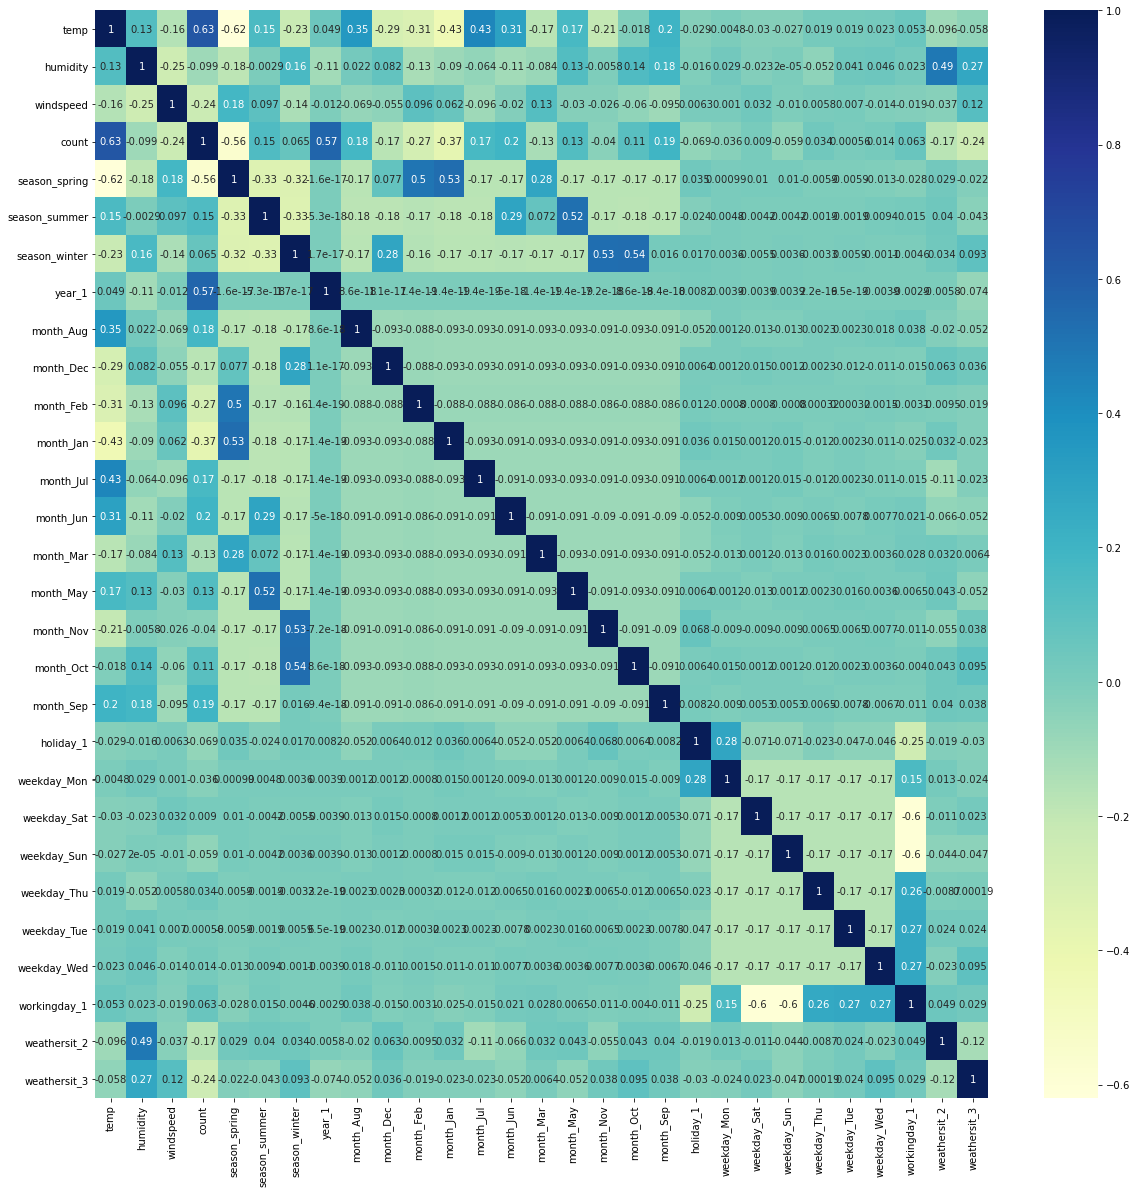

In [30]:
# Heatmap to check for correlation

plt.figure(figsize=(20, 20))
sns.heatmap(bike_new.corr(), cmap='YlGnBu', annot = True)
plt.show()

In [31]:
# Observations from heatmap shows that there is a positive correlation with summer season, temp and June to october months

In [32]:
from sklearn.model_selection import train_test_split


train_bike, test_bike = train_test_split(bike_new, train_size = 0.7, random_state = 100)

In [33]:
train_bike

,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_1,month_Aug,month_Dec,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,weathersit_2,weathersit_3
576,29.246653,70.4167,11.083475,7216,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
426,16.980847,62.1250,10.792293,4066,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,10.489153,48.3333,23.500518,1796,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
482,15.443347,48.9583,8.708325,4220,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
111,13.803347,72.9583,14.707907,1683,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,30.852500,65.9583,8.666718,7261,0,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
53,9.091299,42.3043,6.305571,1917,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
350,10.591653,56.0833,16.292189,2739,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
79,17.647835,73.7391,19.348461,2077,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0


In [34]:
print(train_bike.shape)
print(test_bike.shape)

(510, 29)
(220, 29)


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['temp','humidity','windspeed','count']

train_bike[num_vars] = scaler.fit_transform(train_bike[num_vars])

In [36]:
train_bike

,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_1,month_Aug,month_Dec,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,weathersit_2,weathersit_3
576,0.815169,0.725633,0.264686,0.827658,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
426,0.442393,0.640189,0.255342,0.465255,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,0.245101,0.498067,0.663106,0.204096,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
482,0.395666,0.504508,0.188475,0.482973,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
111,0.345824,0.751824,0.380981,0.191095,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0.863973,0.679690,0.187140,0.832835,0,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
53,0.202618,0.435939,0.111379,0.218017,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
350,0.248216,0.577930,0.431816,0.312586,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
79,0.462664,0.759870,0.529881,0.236424,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0


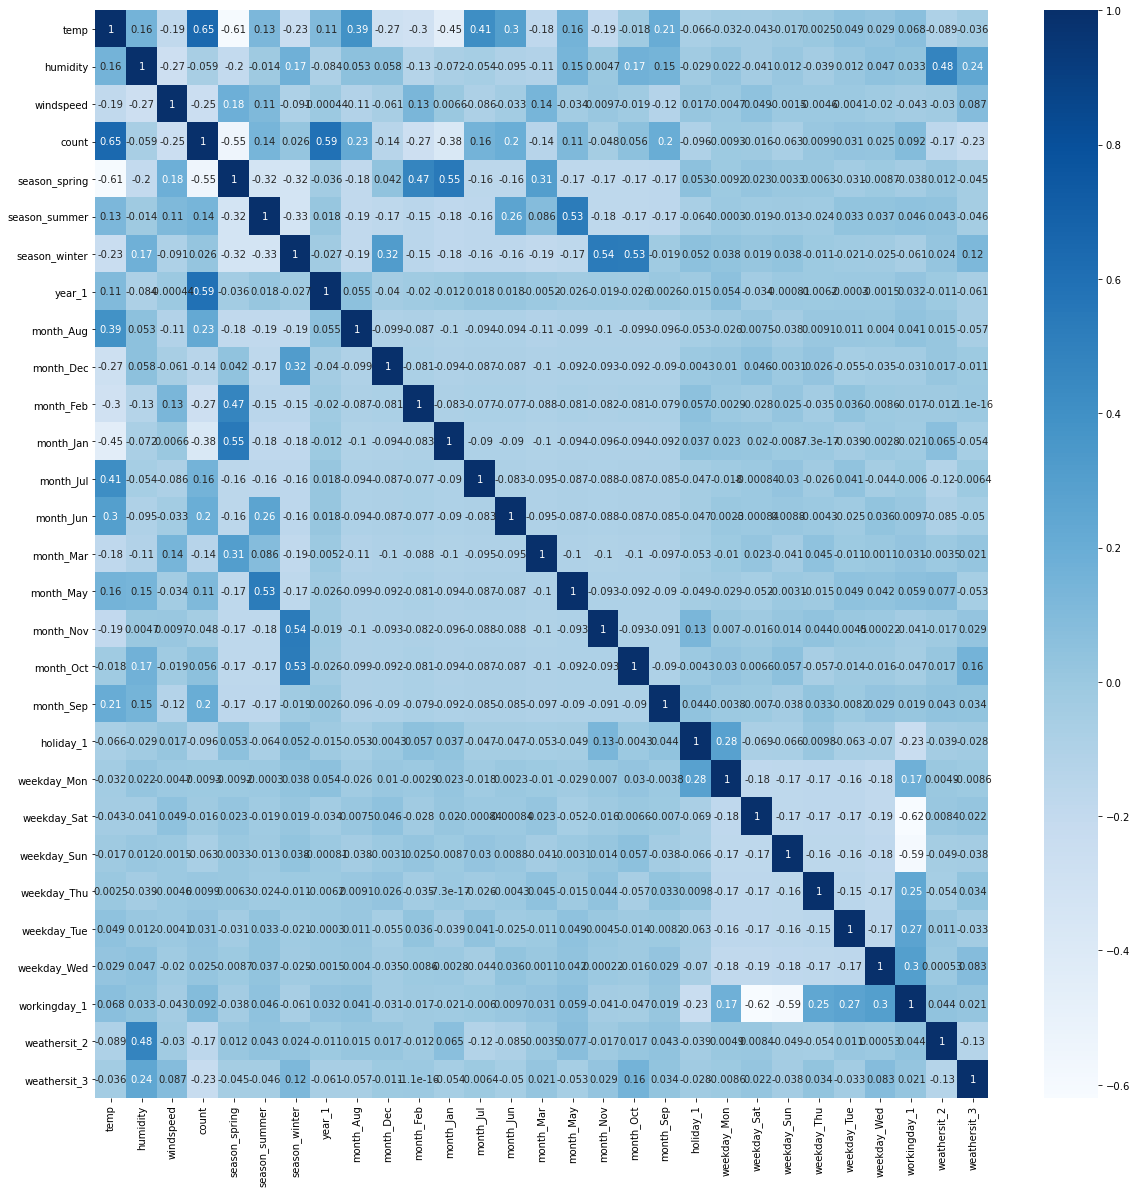

In [37]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_bike.corr(),cmap='Blues',annot = True)
plt.show()

#### No major changes after rescaling

## Linear Model
### Dividing into X and y variables

In [40]:
X_train = train_bike.drop(columns=['count'],axis='columns')
y_train = train_bike['count']

In [41]:
X_train

,temp,humidity,windspeed,season_spring,season_summer,season_winter,year_1,month_Aug,month_Dec,month_Feb,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,weathersit_2,weathersit_3
576,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
426,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
728,0.245101,0.498067,0.663106,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
482,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
111,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0.863973,0.679690,0.187140,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
53,0.202618,0.435939,0.111379,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
350,0.248216,0.577930,0.431816,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
79,0.462664,0.759870,0.529881,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0


In [42]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [45]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 16)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('year_1', True, 1),
 ('month_Aug', False, 5),
 ('month_Dec', False, 2),
 ('month_Feb', False, 3),
 ('month_Jan', True, 1),
 ('month_Jul', True, 1),
 ('month_Jun', False, 12),
 ('month_Mar', False, 13),
 ('month_May', False, 4),
 ('month_Nov', True, 1),
 ('month_Oct', False, 11),
 ('month_Sep', True, 1),
 ('holiday_1', True, 1),
 ('weekday_Mon', False, 7),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 6),
 ('weekday_Thu', False, 9),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 10),
 ('workingday_1', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [47]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'humidity', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'year_1', 'month_Jan', 'month_Jul', 'month_Nov',
       'month_Sep', 'holiday_1', 'weekday_Sat', 'workingday_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [48]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [49]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [59]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.30e-190
Time:                        19:13:24   Log-Likelihood:                 520.61
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     493   BIC:                            -935.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2586      0.036      7.096

In [60]:
X_train_rfe1 = X_train_rfe.drop(["month_Nov"], axis = 1)


In [61]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe1)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          4.22e-191
Time:                        19:14:04   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.036      6.969

In [63]:
X_train_rfe2 = X_train_lm.drop(["month_Jan"], axis = 1)


In [65]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe2)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.11e-191
Time:                        19:16:07   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2402      0.036      6.714

In [66]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.35
4,season_spring,5.02
1,temp,3.62
6,season_winter,3.49
5,season_summer,2.62
2,humidity,1.91
12,workingday_1,1.88
11,weekday_Sat,1.78
13,weathersit_2,1.57
8,month_Jul,1.49


In [67]:
X_train_new3 = X.drop(['season_spring'], axis=1)


In [69]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new3)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          5.23e-191
Time:                        19:17:29   Log-Likelihood:                 513.89
No. Observations:                 510   AIC:                            -999.8
Df Residuals:                     496   BIC:                            -940.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1822      0.029      6.331

In [70]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.62
2,humidity,1.88
11,workingday_1,1.88
10,weekday_Sat,1.78
1,temp,1.60
12,weathersit_2,1.56
7,month_Jul,1.43
4,season_summer,1.33
5,season_winter,1.29
13,weathersit_3,1.24


In [71]:
X_train_new4 = X.drop(['const'], axis=1)


In [74]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,humidity,16.71
0,temp,10.36
10,workingday_1,5.02
2,windspeed,3.80
11,weathersit_2,2.11
5,year_1,2.03
9,weekday_Sat,1.90
3,season_summer,1.77
4,season_winter,1.70
6,month_Jul,1.55


In [75]:
X_train_new5 = X.drop(['humidity'], axis=1)


In [85]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.47
9,workingday_1,4.39
1,windspeed,3.57
4,year_1,2.02
8,weekday_Sat,1.77
2,season_summer,1.76
10,weathersit_2,1.54
5,month_Jul,1.53
3,season_winter,1.48
6,month_Sep,1.29


### Residual Analysis of the train data

### Making Predictions and apply the scaling on the test sets

In [78]:
num_vars = ['temp', 'windspeed', 'humidity','count']

test_bike[num_vars] = scaler.transform(test_bike[num_vars])

In [79]:
y_test = test_bike.pop('count')
X_test = test_bike



In [86]:
X_train_new5.columns

Index(['temp', 'windspeed', 'season_summer', 'season_winter', 'year_1',
       'month_Jul', 'month_Sep', 'holiday_1', 'weekday_Sat', 'workingday_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [87]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new5.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [88]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

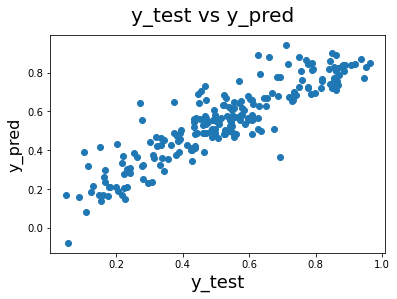

In [89]:
# Model Evaluation
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## R2 Value

In [91]:

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
r2

0.7858666376188095

## Adjusted R2 Square

In [92]:
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7544753593639753

### Final Result

R2 square=0.785
Adjusted R2 Square=0.7544

* Temparature as positive impact on bike rentals.
* Rentals are more during summer and working days.
* We can see some negative coefficients which suggests that as independent variable increases dependent variable decreases.